In [0]:
#necessary library
import datetime
import pandas as pd
import numpy as np
import time

In [2]:
#mount google drive as a local hard
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def load_database(path):
  data_set = pd.read_csv(path, names = ['bin', 'mac', 'rss','time_stamp'], skiprows=1)
  return data_set

In [0]:
output_dateset = '/content/gdrive/My Drive/australia_phd/phd_data/dataset_negative.csv'
output_database_st = '/content/gdrive/My Drive/australia_phd/phd_data/database_data/database_ouptout_final_student.csv'
#output_database = '/content/gdrive/My Drive/australia_phd/phd_data/database_data/database_ouptout_final.csv'

In [0]:
def load_dataset(path):
  data_set = pd.read_csv(path)
  return data_set

In [0]:
database = load_database(output_database_st)
dataset = load_dataset(output_dateset)

In [20]:
len(database['mac'].unique())

4

In [21]:
print(database.describe)
#print(dataset.head())

<bound method NDFrame.describe of         bin  mac  rss           time_stamp
0        38    1   89  2019-09-22 15:14:48
1        38    1   73  2019-09-22 15:15:20
2        11    1   89  2019-09-22 15:15:21
3        37    1   80  2019-09-22 15:15:22
4        33    1   89  2019-09-22 15:15:22
...     ...  ...  ...                  ...
458883    7    2   81  2019-09-18 14:09:42
458884   12    2   80  2019-09-18 14:09:42
458885    3    2   82  2019-09-18 14:09:43
458886    6    2   74  2019-09-18 14:09:43
458887   18    2   75  2019-09-18 14:09:44

[458888 rows x 4 columns]>


In [0]:
groub_by_dataset = dataset.groupby(['user','x','y']).agg({'tmstm' : [np.min, np.max]})
min_max_date_time = groub_by_dataset.reset_index()

In [0]:
min_values = min_max_date_time['tmstm']['amin']
max_values = min_max_date_time['tmstm']['amax']
print(min_max_date_time)

     user   x   y                tmstm                     
                                  amin                 amax
0       1   0   0  2019-09-25 18:41:40  2019-09-25 18:41:59
1       1   0   1  2019-09-25 18:42:09  2019-09-25 18:43:29
2       1   0   2  2019-09-25 18:43:37  2019-09-25 18:44:47
3       1   0   3  2019-09-25 18:44:55  2019-09-25 18:45:49
4       1   0   4  2019-09-25 18:45:59  2019-09-25 18:47:29
...   ...  ..  ..                  ...                  ...
4003    4  30  28  2019-10-25 11:20:05  2019-10-25 11:20:18
4004    4  30  29  2019-10-25 11:21:04  2019-10-25 11:21:18
4005    4  30  30  2019-10-25 11:22:03  2019-10-25 11:22:15
4006    4  30  31  2019-10-25 11:23:04  2019-10-25 11:23:15
4007    4  30  32  2019-10-25 11:24:04  2019-10-25 11:24:13

[4008 rows x 5 columns]


In [0]:
for x in range(1, max_values.size-1): 
  #all_dataset = [ds_up_1, ds_up_2, ds_up_3, ds_up_4]
  #all_dataset = pd.concat(all_dataset)
  #if x == 3:
  #  exit
  minvalue = min_max_date_time['tmstm']['amin'][x]
  maxvalue = min_max_date_time['tmstm']['amax'][x]
  user = min_max_date_time['user'][x]
  #print("user {0} minvalue {1} maxvalue {2} i {3}".format(user,minvalue,maxvalue,x))
  res = database[(database['time_stamp']>= minvalue) & (database['time_stamp']<=maxvalue) & (database['mac']==user)]
  if x == 1:
    acc = res 
    #print('-------1')
    #print(acc)
  else:
    #print('------------')
    #print(res)
    #print('------------')
    acc = [acc, res]
    acc = pd.concat(acc)
    #print(acc)
    #print('+++++')

In [0]:
acc.to_csv(path_or_buf='/content/gdrive/My Drive/australia_phd/phd_data/database_data/database_ouptout_final_student_filtered.csv')

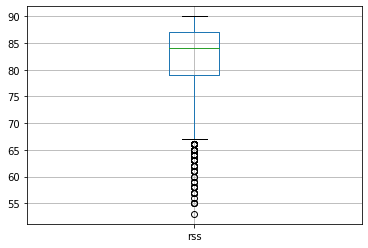

In [0]:
bin13_u1 = acc[(acc['bin']==13)&(acc['mac']==1)]
bin13_u1.boxplot(column='rss')

In [0]:
bin13_u1_m = 